Tema: Clasificación automática de tumores mamarios para la detección temprana de cáncer de mama benigno y maligno

Accuracy: 97.37%


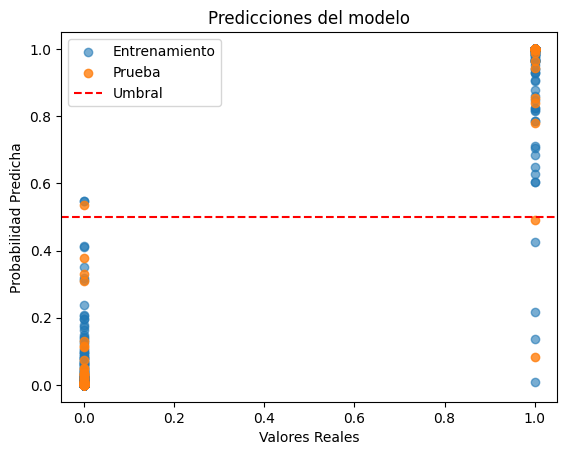

Probabilidad de ser maligno: 15.24%


c:\Users\ayece\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# * Cargar el dataset
data = pd.read_csv("breast-cancer.csv")

# * Eliminar filas con valores faltantes
data = data.dropna()

# * Eliminar columna 'id' si existe
if 'id' in data.columns:
    data = data.drop('id', axis=1)

# * Convertir diagnóstico a valores numéricos: Maligno -> 1, Benigno -> 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# * Separar características y etiqueta
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# * Normalizar características numéricas, calcula la media y la desviación estándar de cada columna
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# * Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
# * Utilizar una semilla aleatoria para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# * Construir el modelo
model = LogisticRegression(random_state=42, max_iter=1000)

# * Entrenar el modelo
model.fit(X_train, y_train)

# * Evaluar el modelo
y_pred_test = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# * Obtener probabilidades para el gráfico
y_pred_proba_train = model.predict_proba(X_train)[:, 1]
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

# * Graficar las predicciones
plt.scatter(y_train, y_pred_proba_train, alpha=0.6, label='Entrenamiento')
plt.scatter(y_test, y_pred_proba_test, alpha=0.8, label='Prueba')
plt.axhline(y=0.5, color='red', linestyle='--', label='Umbral')
plt.xlabel('Valores Reales')
plt.ylabel('Probabilidad Predicha')
plt.title('Predicciones del modelo')
plt.legend()
plt.show()

# * Características de una nueva muestra
radius_mean = 14.5
texture_mean = 18.2
perimeter_mean = 95.0
area_mean = 650.0
smoothness_mean = 0.1
compactness_mean = 0.15
concavity_mean = 0.08
concave_points_mean = 0.05
symmetry_mean = 0.18
fractal_dimension_mean = 0.062
radius_se = 0.5
texture_se = 1.2
perimeter_se = 3.5
area_se = 25.0
smoothness_se = 0.005
compactness_se = 0.02
concavity_se = 0.01
concave_points_se = 0.003
symmetry_se = 0.015
fractal_dimension_se = 0.002
radius_worst = 16.0
texture_worst = 25.0
perimeter_worst = 110.0
area_worst = 800.0
smoothness_worst = 0.15
compactness_worst = 0.25
concavity_worst = 0.15
concave_points_worst = 0.08
symmetry_worst = 0.25
fractal_dimension_worst = 0.08

nueva_muestra = np.array([[ 
    radius_mean,
    texture_mean,
    perimeter_mean,
    area_mean,
    smoothness_mean,
    compactness_mean,
    concavity_mean,
    concave_points_mean,
    symmetry_mean,
    fractal_dimension_mean,
    radius_se,
    texture_se,
    perimeter_se,
    area_se,
    smoothness_se,
    compactness_se,
    concavity_se,
    concave_points_se,
    symmetry_se,
    fractal_dimension_se,
    radius_worst,
    texture_worst,
    perimeter_worst,
    area_worst,
    smoothness_worst,
    compactness_worst,
    concavity_worst,
    concave_points_worst,
    symmetry_worst,
    fractal_dimension_worst
]])

nueva_muestra = scaler.transform(nueva_muestra)

# * Predecir la probabilidad de ser maligno
prediccion = model.predict_proba(nueva_muestra)[0][1]

print(f"Probabilidad de ser maligno: {prediccion*100:.2f}%")